In [1]:
from google.colab import files
import os
from google.colab import files
files.upload()

# Настройка Kaggle API
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda
!unzip animal-image-datasetdog-cat-and-panda.zip -d dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset/animals/animals/dogs/dogs_00007.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00008.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00009.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00010.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00011.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00012.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00013.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00014.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00015.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00016.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00017.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00018.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00019.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00020.jpg  
  inflating: dataset/animals/animals/dogs/dogs_00021.jpg  
  inflating: dataset/animals/animals/dogs/dogs_

In [2]:
!pip install imutils

In [3]:
from imutils import paths
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model
from imutils import paths
import os
import random
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

In [5]:
from imutils import paths
data_path = "dataset/animals"
image_paths = list(paths.list_images(data_path))

In [4]:
data_path = "dataset/animals"

# Ограничиваем количество изображений, а то пипец он вылетает боже слов уже на него нет приличных
max_images = 1000  # Установите желаемое ограничение

image_paths = list(paths.list_images(data_path))
# Перемешаем пути изображений и возьмём только первые max_images (не обяхательно, просто прикольно, что называется функция как стиль танца шафл)
random.seed(42)
random.shuffle(image_paths)
image_paths = image_paths[:max_images]

# Подготовка данных
data = []
labels = []

for image_path in image_paths:
    try:
        image = cv2.imread(image_path)
        if image is None:
            continue

        image = cv2.resize(image, (224, 224))
        data.append(image)
        label = os.path.split(os.path.dirname(image_path))[-1]  # метка из пути
        labels.append(label)
    except Exception as e:
        print(f"Ошибка при обработке {image_path}: {e}")



print("Классы", set(labels))

Классы {'panda', 'cats', 'dogs'}


In [6]:
# Нормализация изображений
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Преобразование меток
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
class_names = lb.classes_
print("Классы после бинаризации:", class_names)

Классы после бинаризации: ['cats' 'dogs' 'panda']


In [7]:
#Разделение данных
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)
print(f"Размеры данных: Train={X_train.shape}, Test={X_test.shape}")

Размеры данных: Train=(750, 224, 224, 3), Test=(250, 224, 224, 3)


In [8]:
import os
import random
import time
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from tensorflow.keras.models import load_model

In [10]:
model_paths = {
    'Model2': '/content/model_2.h5',
    'Model3': '/content/model_3(2).h5',
    'Model4': '/content/model_4.h5',
    'Model5': '/content/model_5.h5'
}

models = {}

for name, path in model_paths.items():
        models[name] = load_model(path)
        print(f'{name} агружена')
        models[name].summary()


Model2 агружена


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,673,606 (14.01 MB)

 Trainable params: 3,673,604 (14.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model3 агружена


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,198,918 (16.02 MB)

 Trainable params: 4,198,916 (16.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Model4 агружена


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_46 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_49          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_50          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_51          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 611,910 (2.33 MB)

 Trainable params: 611,204 (2.33 MB)

 Non-trainable params: 704 (2.75 KB)

 Optimizer params: 2 (12.00 B)

Model5 агружена


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,029 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2 (12.00 B)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


8/8 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step


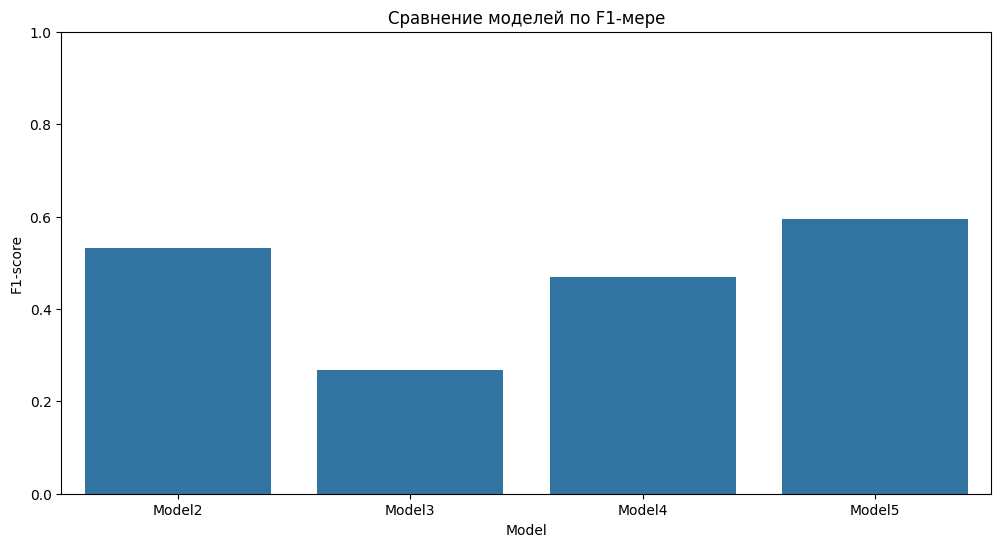

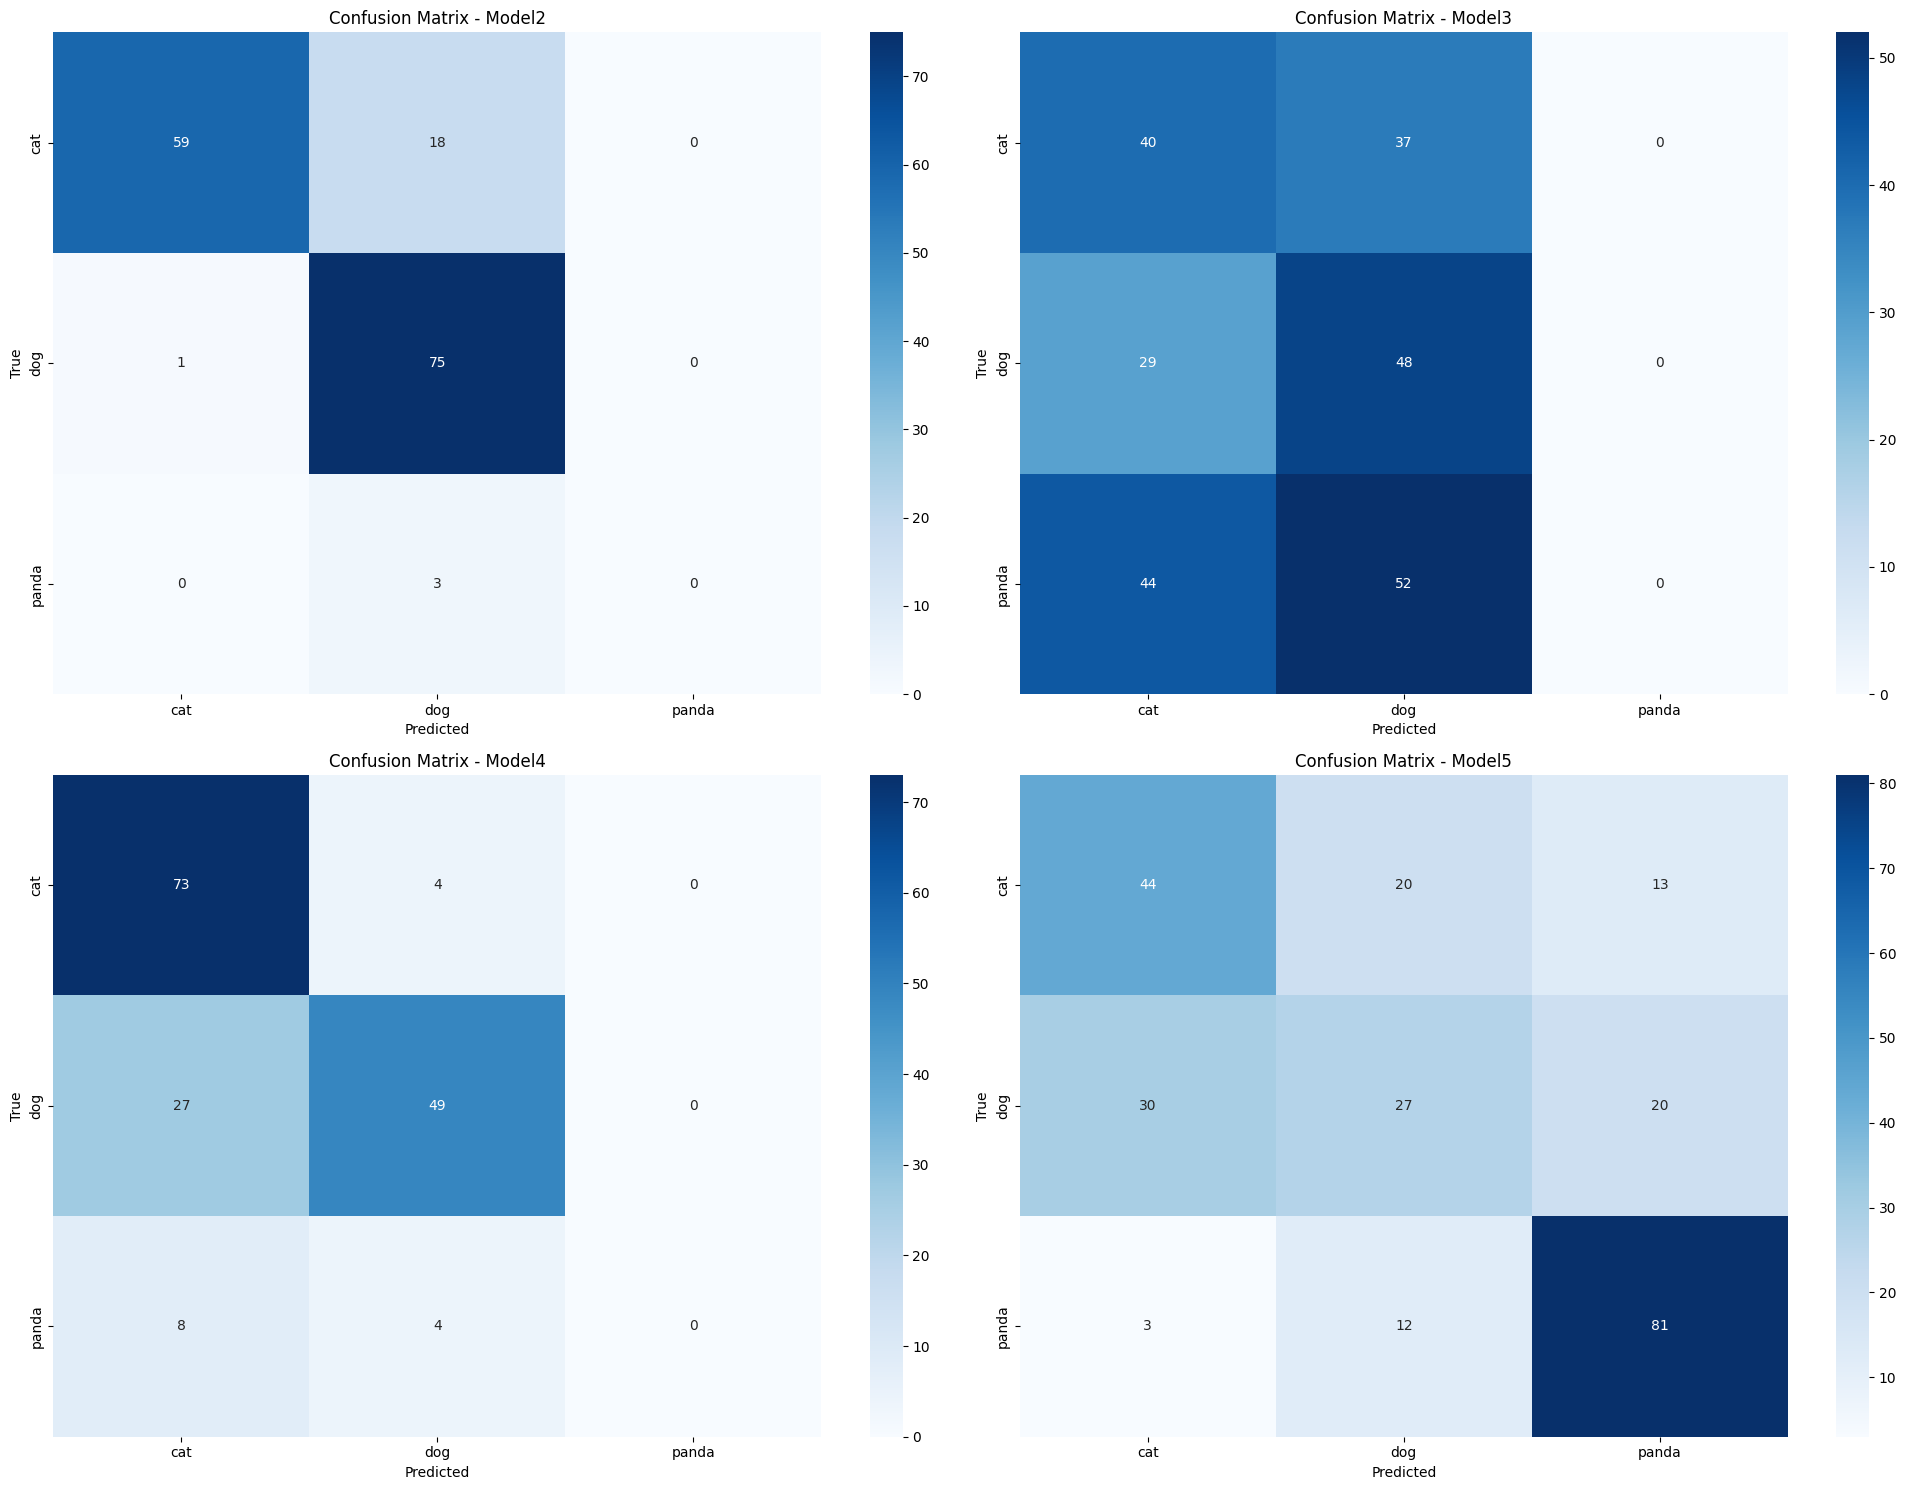

In [12]:
import numpy as np
import cv2
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

model_paths = {
    'Model2': '/content/model_2.h5',
    'Model3': '/content/model_3(2).h5',
    'Model4': '/content/model_4.h5',
    'Model5': '/content/model_5.h5'
}

class_names = ['cat', 'dog', 'panda']

def fix_predictions(predictions, expected_classes=3):

    return predictions[:, :expected_classes] if predictions.shape[1] > expected_classes else predictions


def prepare_data(X, model_name):
    if model_name == 'Model2':
        resized = np.array([cv2.resize(img, (32, 32)) for img in X])
        return resized.reshape(-1, 32*32*3)

    elif model_name == 'Model3':
        resized = np.array([cv2.resize(img, (32, 32)) for img in X])
        return resized.reshape(-1, 32*32*3)  # Противная модель, на вход одна единственная принимала плоский вектор)))))))))

    elif model_name == 'Model4':
        return np.array([cv2.resize(img, (30, 30)) for img in X])

    else:
        return np.array([cv2.resize(img, (224, 224)) for img in X])

# Сравнение моделей
results = []
confusion_matrices = {}

for name, model in models.items():
    try:
        start_time = time.time()
        X_test_adapted = prepare_data(X_test, name)


        if name == 'Model3':
            predictions = model.predict(X_test_adapted)
            predictions = fix_predictions(predictions)
        else:
            predictions = model.predict(X_test_adapted)

        pred_labels = np.argmax(predictions, axis=1)
        true_labels = np.argmax(y_test, axis=1)

        if name == 'Model3':
            pred_labels = np.where(pred_labels >= 3, 2, pred_labels)

        # Вычисление метрик
        acc = accuracy_score(true_labels, pred_labels)
        rec = recall_score(true_labels, pred_labels, average='weighted')
        prec = precision_score(true_labels, pred_labels, average='weighted')
        f1 = f1_score(true_labels, pred_labels, average='weighted')

        # Сохранение результатов
        cm = confusion_matrix(true_labels, pred_labels, labels=[0, 1, 2])
        confusion_matrices[name] = cm

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Recall': rec,
            'Precision': prec,
            'F1-score': f1,
            'Inference Time': time.time() - start_time
        })

    except Exception as e:
        print(f"Ошибка в модели {name}: {str(e)}")
        continue

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='F1-score', data=pd.DataFrame(results))
plt.title('Сравнение моделей по F1-мере')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(20, 15))
for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()
plt.show()

Результаты сравнения моделей:
    Model  Accuracy  F1-score  Inference Time
0  Model2     0.536  0.532337        1.164574
1  Model3     0.352  0.267852        1.074978
2  Model4     0.488  0.468324        0.583264
3  Model5     0.608  0.594523       83.086066


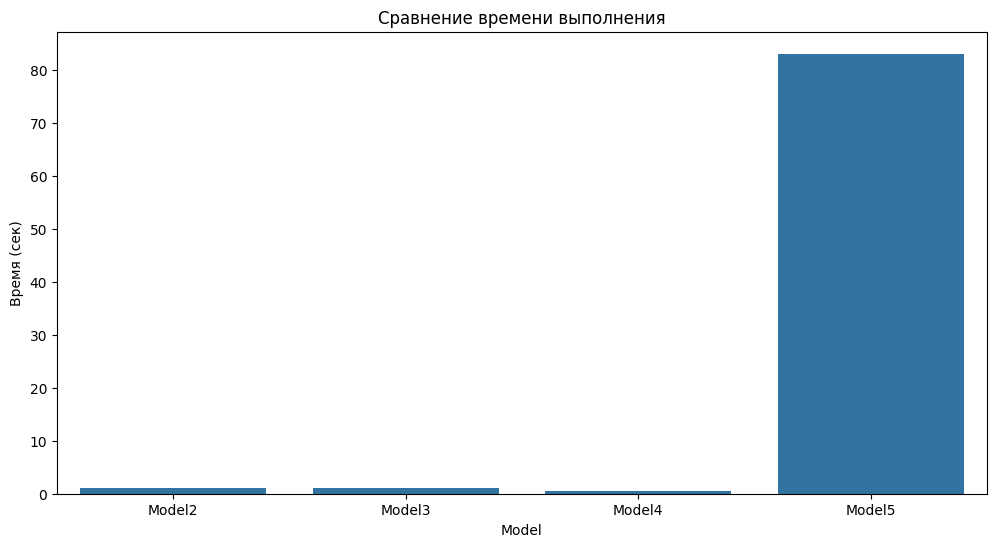

In [14]:
results_df = pd.DataFrame(results)
print("Результаты сравнения моделей:")
print(results_df[['Model', 'Accuracy', 'F1-score', 'Inference Time']])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Inference Time', data=results_df)
plt.title('Сравнение времени выполнения')
plt.ylabel('Время (сек)')
plt.show()


Ну, в итоге выбираем последнюю модельку

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('model_5.h5')

model.save('keras_model.keras')

***НЕ ВЫПОЛНЯТЬ ДАЛЬШЕ!***

***Раздел 2. Развертывание API***


Создать FastAPI приложение для обработки запросов с изображениями
Реализовать предобработку загружаемых изображений
Реализовать эндпоинт для классификации изображений
Добавить возврат предсказанного класса и вероятностей по всем классам
Создать файл requirements.txt с необходимыми зависимостями
Развернуть API на сервере с доступом из глобальной сети

In [ ]:
from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.middleware.cors import CORSMiddleware
import numpy as np
import tensorflow as tf
from PIL import Image
import io
import os
import logging
#(чтобы потом разбираться, что пошло не так) потому что иначе не поймешь ничего
logger = logging.getLogger("uvicorn.error")

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_methods=["POST", "GET", "OPTIONS"],
    allow_headers=["*"],
)

# Конфигурация
MODEL_PATH = "model.keras"
CLASS_NAMES = ['cat', 'dog', 'panda']
MAX_FILE_SIZE = 2 * 1024 * 1024  # было сделано, чтобы сервак не рухнул, но он все равно рухнул
ALLOWED_CONTENT_TYPES = {"image/jpeg", "image/png"}

model = None

def load_model():
    global model
    if model is None:
        if not os.path.exists(MODEL_PATH):
            logger.error(f"Модель не найдена по пути {MODEL_PATH}")
            raise FileNotFoundError(f"Model file {MODEL_PATH} not found")
        model = tf.keras.models.load_model(MODEL_PATH)
        logger.info(f"Model loaded. TF version: {tf.__version__}")
    return model
# Проверка картинки перед обработкой (чтобы не сломать сервер) (спойлер: он все равно сломался)
def validate_image(file: UploadFile, content: bytes):
    if file.content_type not in ALLOWED_CONTENT_TYPES:
        raise HTTPException(400, "Invalid file type. Only JPEG, PNG supported.")
    if len(content) > MAX_FILE_SIZE:
        raise HTTPException(400, f"File too large. Maximum is {MAX_FILE_SIZE // (1024*1024)}MB.")
#ничего инетерного
def preprocess_image(image: Image.Image):
    try:
        image = image.convert('RGB')
        image = image.resize((224, 224))
        image_array = np.array(image)
        image_array = np.expand_dims(image_array, axis=0)
        processed = tf.keras.applications.mobilenet_v2.preprocess_input(image_array)
        return processed
    except Exception as e:
        logger.error(f"Image processing error: {str(e)}")
        raise HTTPException(400, "Invalid image format or corrupt image.")
# Загружаем модель при старте сервера (чтобы потом не тормозить, но сервак рендер не выдерживает такого нахальства, а иначе сервак засыпает и потом отваливается фронтенд)
@app.on_event("startup")
async def startup_event():
    load_model()
# Проверка здоровья сервера (чтобы знать, что он живой)(спойлер: он был долго не живой)
@app.get("/", tags=["health"])
async def health_check():
    return {
        "status": "OK",
        "endpoints": {
            "predict": {
                "method": "POST",
                "path": "/predict/",
                "input": "image/jpeg or image/png",
                "max_size": "2MB"
            }
        }
    }

@app.post("/predict/")
async def predict(file: UploadFile = File(...)):
    contents = await file.read()
    validate_image(file, contents)
    mdl = load_model()
    image = Image.open(io.BytesIO(contents))
    processed_image = preprocess_image(image)
    try:
        predictions = mdl.predict(processed_image)
        out_probs = predictions[0].astype(float)
        result_class_index = int(np.argmax(out_probs))
        return {
            "class": CLASS_NAMES[result_class_index],
            "probabilities": {
                cls: float(prob)
                for cls, prob in zip(CLASS_NAMES, out_probs)
            }
        }
    except Exception as e:
        logger.error(f"Prediction error: {str(e)}")
        raise HTTPException(500, f"Processing error: {str(e)}")

if __name__ == "__main__":
    import uvicorn
    uvicorn.run(app, host="0.0.0.0", port=8000)

    # 0.0.0.0 - значит слушаем все интерфейсы (шпиён)

***Раздел 3. Создание интерфейса на Streamlit***


Разработать Streamlit-приложение со следующими функциями:
Возможность загрузки изображения пользователем
Возможность рисования изображения на холсте
Предобработка изображения перед отправкой на API
Отображение результатов классификации
Визуализация распределения вероятностей по классам
Развернуть Streamlit-приложение на платформе Streamlit Cloud

In [ ]:
import streamlit as st
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

#API_URL = "https://nine-laba.onrender.com/predict/" # это для онлайна
API_URL = "http://127.0.0.1:8000/predict/"# Локальный сервер, потому что НЕ локальный УМЕР БЛИН
CLASS_NAMES = ['cat', 'dog', 'panda']
MAX_FILE_SIZE = 2 * 1024 * 1024  # 2 MB (больше - уже тяжело было для онлайн сервера, компу в принципе все равно)
# красевенька
st.title("Классификация изображений 🐱🐶🐼")
st.markdown("Загрузите изображение кошки, собаки или панды")
# Информационка для пользователя (чтоб не спрашивали лишнего,надоели уже)
st.info(f"""
**Поддерживаемые форматы:** JPEG, PNG
**Максимальный размер:** {MAX_FILE_SIZE // 1024 // 1024}MB
**Определяемые классы:** {', '.join(CLASS_NAMES)}
""")


def preprocess_image_client(image: Image.Image) -> bytes:
    """Подготовка изображения для отправки на API"""
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize((224, 224))
    img_byte_arr = BytesIO()
    image.save(img_byte_arr, format='PNG')
    return img_byte_arr.getvalue()

# я устала уже проверять работоспособность и тупа все способы проверки тут есть
def api_health_check():
    try:
        health_url = API_URL.replace("/predict/", "/")
        response = requests.get(health_url, timeout=5)
        return response.status_code == 200
    except Exception:
        return False


def main():
    if not api_health_check():
        st.warning("⚠️ API сервер недоступен или отвечает с ошибкой.")

    uploaded_file = st.file_uploader(
        "Выберите изображение",
        type=['jpg', 'jpeg', 'png'],
        accept_multiple_files=False
    )
    # Если файл загрузили наконец-то!
    if uploaded_file:
        if uploaded_file.size > MAX_FILE_SIZE:
            st.error(f"Файл слишком большой (максимум {MAX_FILE_SIZE // 1024 // 1024}MB)")
            return

        try:
            img = Image.open(uploaded_file)
            st.image(img, caption='Загруженное изображение', use_column_width=True)
            processed = preprocess_image_client(img)
            files = {"file": ("image.png", processed, "image/png")}
            with st.spinner("Анализируем изображение..."):
                response = requests.post(API_URL, files=files, timeout=60)
            if response.status_code == 200:
                result = response.json()
                st.success(f"**Результат:** {result['class'].capitalize()}")
                # Рисуем график вероятностей (просто чтобы красиво и по-умному было)
                fig, ax = plt.subplots()
                bars = ax.bar(result['probabilities'].keys(), result['probabilities'].values())
                ax.bar_label(bars, fmt="%.2f")
                ax.set_ylim(0, 1)
                ax.set_ylabel("Вероятность")
                ax.set_title("Распределение вероятностей по классам")
                st.pyplot(fig)
            elif 400 <= response.status_code < 500:
                st.error(f"Ошибка клиента: {response.text}")
            else:
                st.error(f"Ошибка сервера: {response.status_code}")
        except Exception as e: # Если вообще все плохо
            st.error(f"Ошибка при обработке изображения или соединении: {str(e)}")


if __name__ == "__main__":
    main()

***Раздел 4. Документация и публикация проекта***


Создать GitHub-репозиторий со структурой:
Модели (сохраненная лучшая модель)
API (код и зависимости)
Интерфейс (код Streamlit-приложения)
Документация (README.md)
Требования (requirements.txt)
Добавить в README.md:
Описание проекта и используемого датасета
Описание сравниваемых моделей
Таблицу с результатами сравнения моделей
Визуализации результатов
Инструкции по локальному развертыванию
Ссылки на развернутый API и Streamlit-приложение
Примеры использования API
Предоставить ссылки на:
GitHub-репозиторий
Публичный API для отправки POST-запросов
Streamlit-интерфейс для взаимодействия с моделью

In [ ]:
# вот кучу зависимостей ыло, которые друг с другом не коннектились.каждый раз что-то с чем-от конфликтовало
#
numpy==1.26.4
#numpy==1.23.5
Pillow==10.2.0
protobuf==3.20.3
#tensorflow-cpu==2.15.0
#keras==2.15.0
tensorflow-cpu==2.18.0

fastapi==0.109.2
uvicorn==0.27.1
python-multipart
#ml-dtypes==0.2.0
#ml-dtypes==0.3.2

streamlit==1.33.0
matplotlib==3.8.3
requests==2.31.0

Вот гитхаб

https://github.com/MkatherinaMY/9_laba_2


Примеры классификации:))))

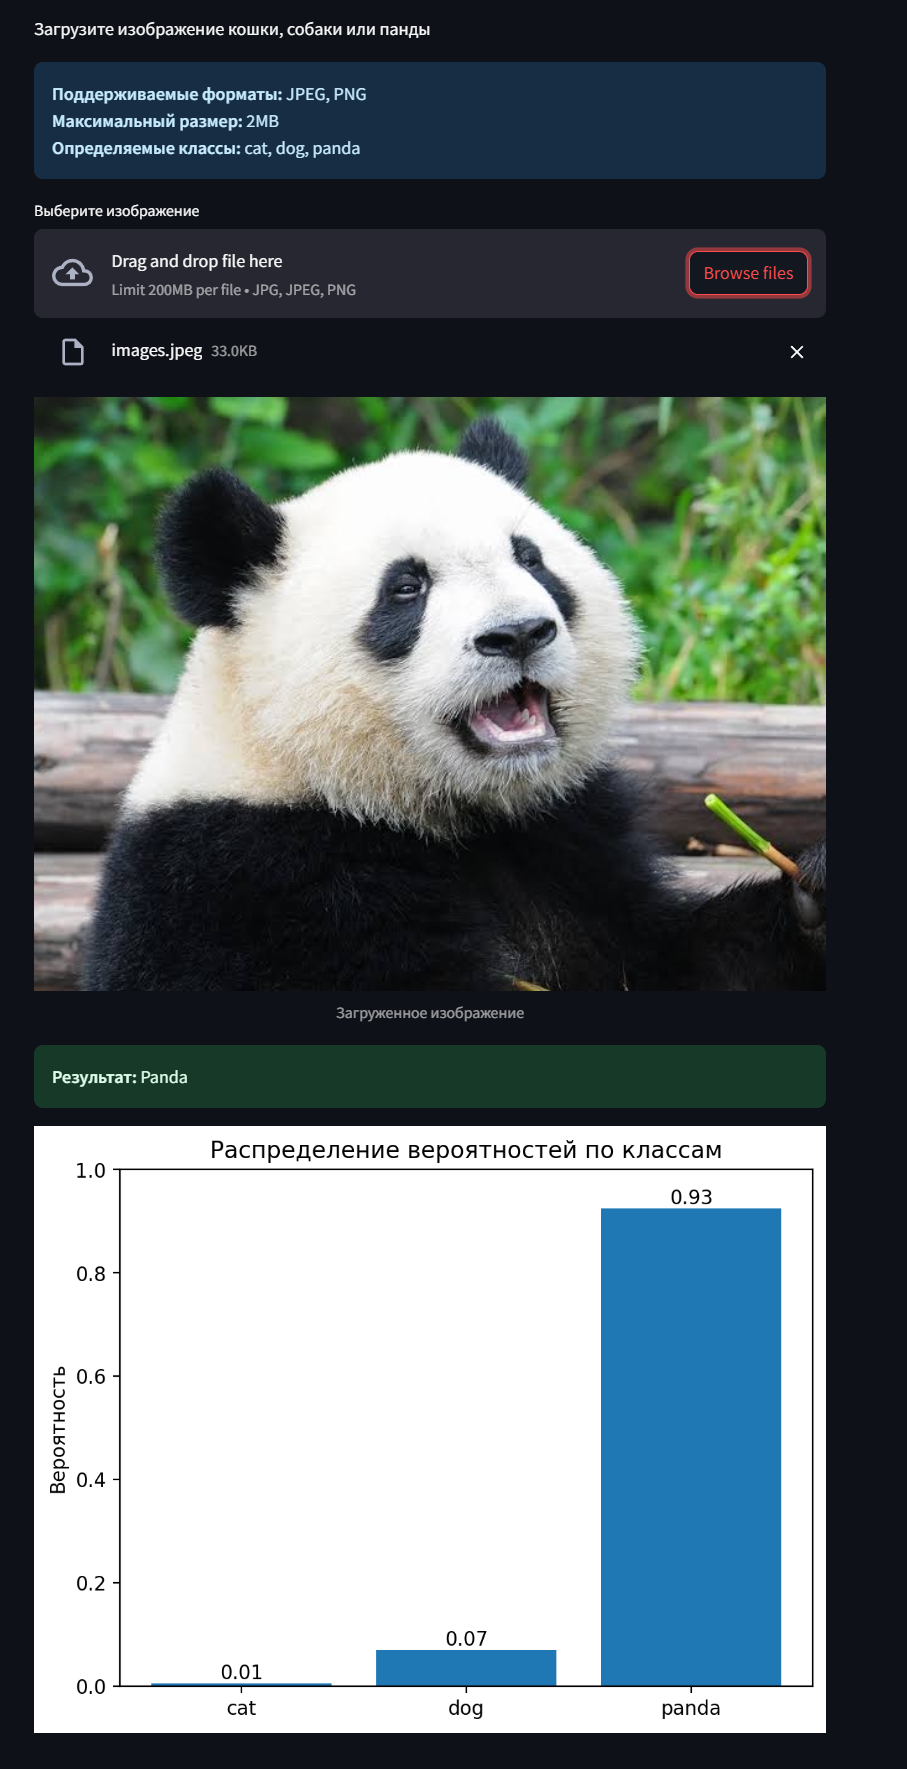

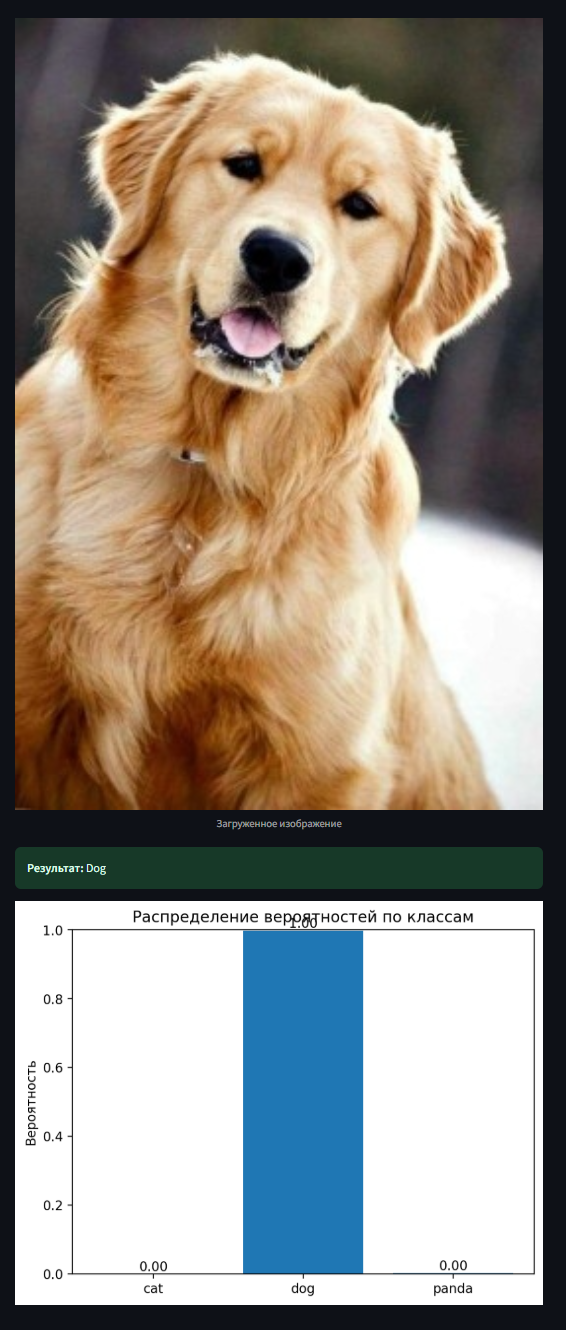

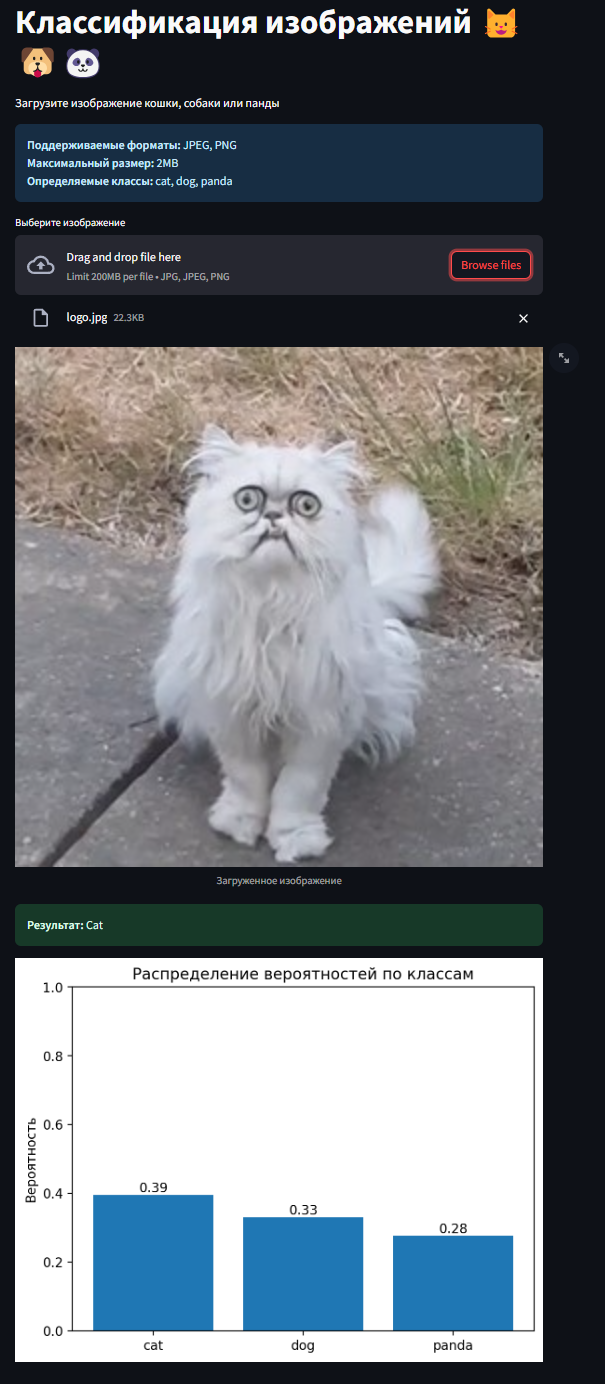